# Importing Necessary Packages

In [164]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import joblib



# Load Dataset

In [165]:
pump_failure_data = pd.read_csv("data/hypothetical_pump_failure_dataset.csv")
pump_failure_data.sample(5)

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
553,2024-01-24 01:00:00,0.525442,65.865598,103.896142,62.557783,0
518,2024-01-22 14:00:00,0.509933,64.879066,97.702004,56.397593,0
33,2024-01-02 09:00:00,0.394229,73.235980,105.054702,45.088530,0
162,2024-01-07 18:00:00,0.615860,63.052138,104.982217,47.704548,0
107,2024-01-05 11:00:00,0.517458,64.732922,106.383919,52.861952,0


# Data Preprocessing

##### Converting `timestamp` feature to `datetime` data type

In [166]:
pump_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   timestamp        1000 non-null   object 
 1   vibration_level  1000 non-null   float64
 2   temperature_C    1000 non-null   float64
 3   pressure_PSI     1000 non-null   float64
 4   flow_rate_m3h    1000 non-null   float64
 5   failure          1000 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


The `timestamp` column is currently of the `object` data type. We need to convert it to the `datetime` data type.

In [167]:
pump_failure_data['timestamp'] = pd.to_datetime(pump_failure_data['timestamp'])

In [168]:
pump_failure_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        1000 non-null   datetime64[ns]
 1   vibration_level  1000 non-null   float64       
 2   temperature_C    1000 non-null   float64       
 3   pressure_PSI     1000 non-null   float64       
 4   flow_rate_m3h    1000 non-null   float64       
 5   failure          1000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 47.0 KB


##### Check for the Missing Values

In [169]:
pump_failure_data.isnull().sum()

timestamp          0
vibration_level    0
temperature_C      0
pressure_PSI       0
flow_rate_m3h      0
failure            0
dtype: int64

We do not have any missing values in our data.

In [170]:
pump_failure_data.sample(5)

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
639,2024-01-27 15:00:00,0.370492,64.662335,103.979270,52.289028,0
544,2024-01-23 16:00:00,0.252836,66.988940,124.267165,56.882482,1
674,2024-01-29 02:00:00,0.359249,78.076878,89.914453,49.676557,0
703,2024-01-30 07:00:00,0.359154,75.548499,110.237095,45.815396,0
430,2024-01-18 22:00:00,0.381674,71.537033,105.646059,52.332727,0


# Exploratory Data Analysis & Visulization

In [171]:
pump_failure_data.describe()

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-01-21 19:29:59.999999744,0.501933,70.354181,100.058342,49.906404,0.049000
min,2024-01-01 00:00:00,0.175873,55.298057,69.804878,35.352757,0.000000
25%,2024-01-11 09:45:00,0.435241,66.968792,93.520004,46.312898,0.000000
50%,2024-01-21 19:30:00,0.502530,70.315386,99.997492,50.000923,0.000000
75%,2024-02-01 05:15:00,0.564794,73.644411,106.609153,53.334727,0.000000
max,2024-02-11 15:00:00,0.885273,85.965538,139.262377,66.215465,1.000000
std,NaN,0.097922,4.987272,9.834543,5.135663,0.215976


The dataset contains 1,000 records, showing sensor data over time with an average vibration level of 0.502, temperature around 70.35°C, pressure around 100.06 PSI, and flow rate of 49.91 m³/h. The failure rate is low, with failures occurring in only 4.9% of the records.

In [172]:
pump_failure_data['failure'].value_counts()

failure
0    951
1     49
Name: count, dtype: int64

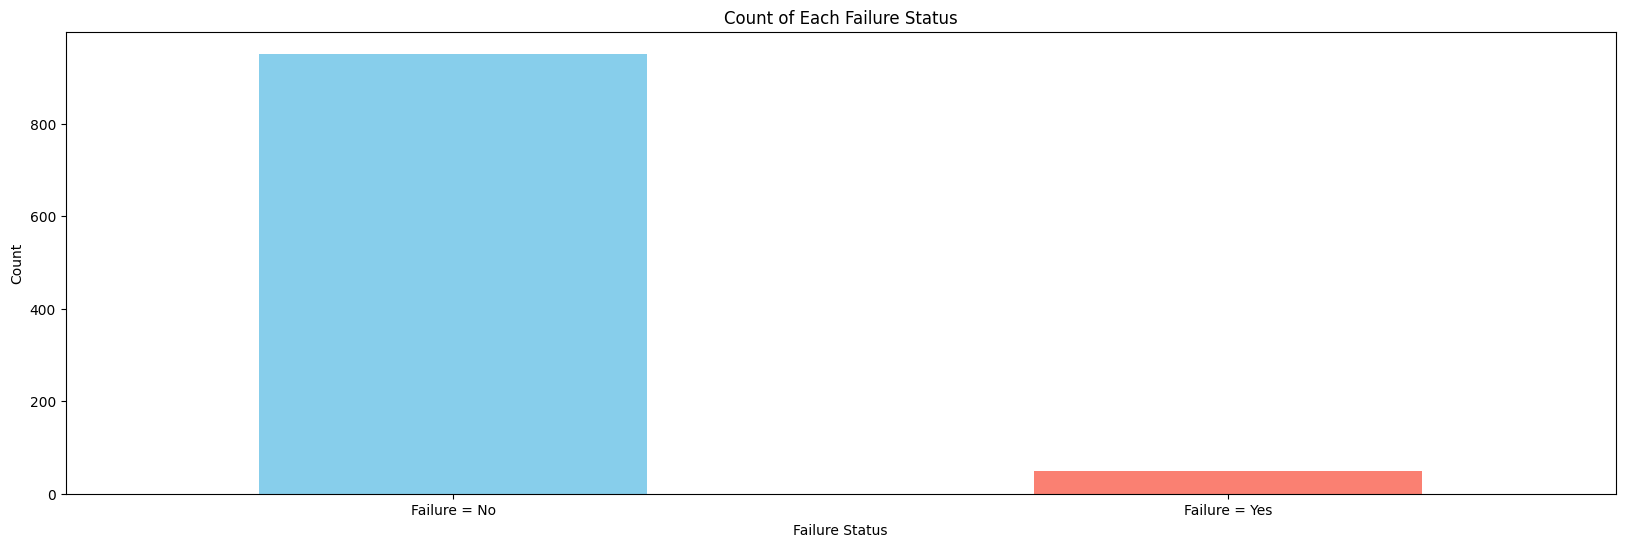

In [173]:
plt.figure(figsize=(20, 6))
pump_failure_data['failure'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Failure Status')
plt.ylabel('Count')
plt.title('Count of Each Failure Status')
plt.xticks(ticks=[0, 1], labels=['Failure = No', 'Failure = Yes'], rotation=0)
plt.show()

In [174]:
pump_failure_data.corr()

,timestamp,vibration_level,temperature_C,pressure_PSI,flow_rate_m3h,failure
timestamp,1.000000,0.035484,-0.027804,0.019423,0.005470,0.008465
vibration_level,0.035484,1.000000,-0.040400,0.022129,-0.013321,0.021784
temperature_C,-0.027804,-0.040400,1.000000,-0.011199,-0.054698,0.052382
pressure_PSI,0.019423,0.022129,-0.011199,1.000000,0.021586,0.235530
flow_rate_m3h,0.005470,-0.013321,-0.054698,0.021586,1.000000,-0.274590
failure,0.008465,0.021784,0.052382,0.235530,-0.274590,1.000000


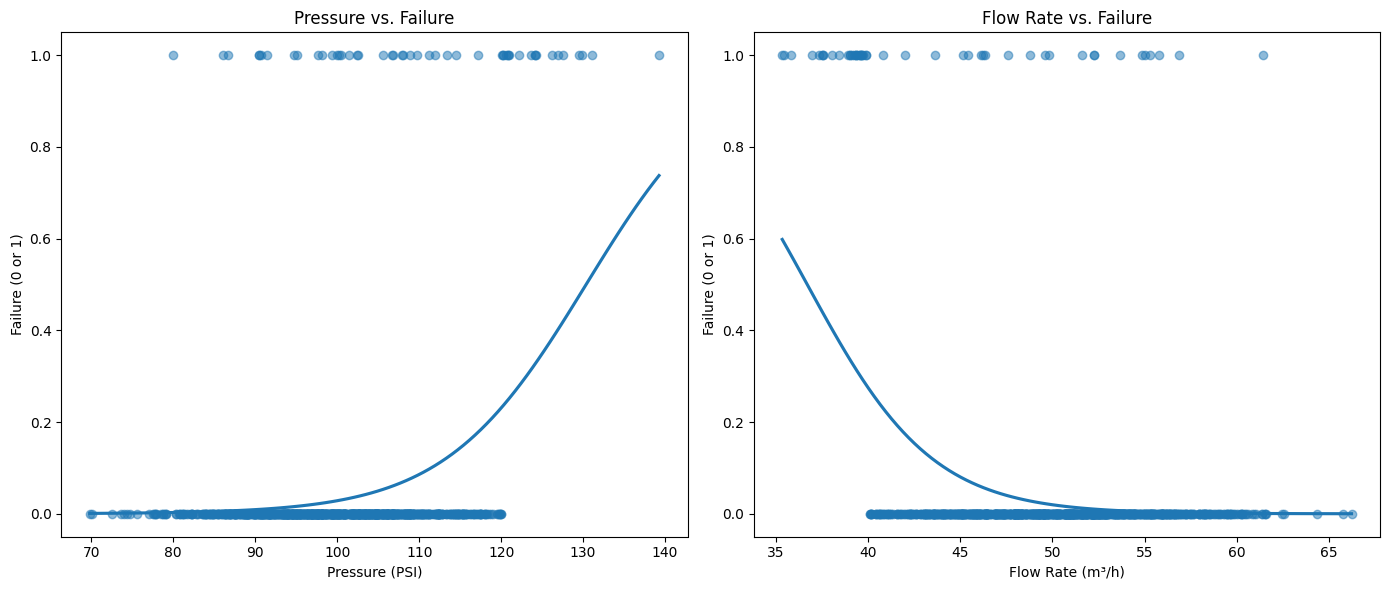

In [175]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.regplot(x='pressure_PSI', y='failure', data=pump_failure_data, logistic=True, ci=None, scatter_kws={'alpha':0.5})
plt.title('Pressure vs. Failure')
plt.xlabel('Pressure (PSI)')
plt.ylabel('Failure (0 or 1)')

# Scatter plot for Flow Rate vs. Failure
plt.subplot(1, 2, 2)
sns.regplot(x='flow_rate_m3h', y='failure', data=pump_failure_data, logistic=True, ci=None, scatter_kws={'alpha':0.5})
plt.title('Flow Rate vs. Failure')
plt.xlabel('Flow Rate (m³/h)')
plt.ylabel('Failure (0 or 1)')

plt.tight_layout()
plt.show()

- **Pressure (PSI) and failure** have a moderate positive correlation (0.236), suggesting that as pressure increases, the likelihood of failure also slightly increases.
- **Flow rate (m³/h) and failure** have a moderate negative correlation (-0.275), indicating that higher flow rates are associated with a reduced likelihood of failure.

#### Time Seriese Analysis

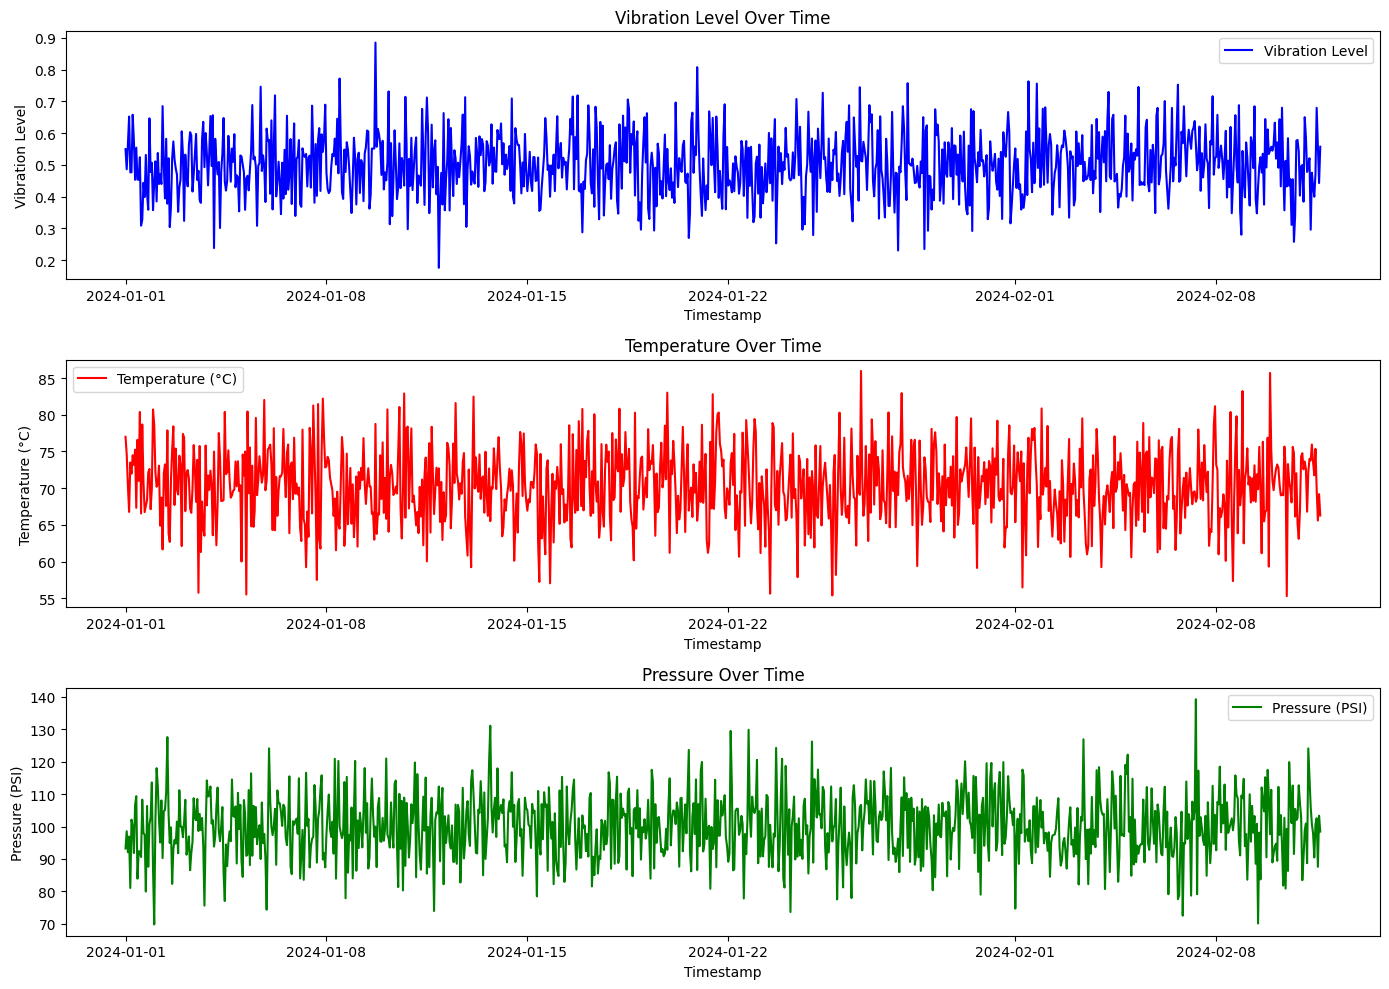

In [177]:

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.plot(pump_failure_data['timestamp'], pump_failure_data['vibration_level'], label='Vibration Level', color='b')
plt.xlabel('Timestamp')
plt.ylabel('Vibration Level')
plt.title('Vibration Level Over Time')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(pump_failure_data['timestamp'], pump_failure_data['temperature_C'], label='Temperature (°C)', color='r')
plt.xlabel('Timestamp')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(pump_failure_data['timestamp'], pump_failure_data['pressure_PSI'], label='Pressure (PSI)', color='g')
plt.xlabel('Timestamp')
plt.ylabel('Pressure (PSI)')
plt.title('Pressure Over Time')
plt.legend()

plt.tight_layout()
plt.show()

#### Seasonality Detection

- Daily Aggregation

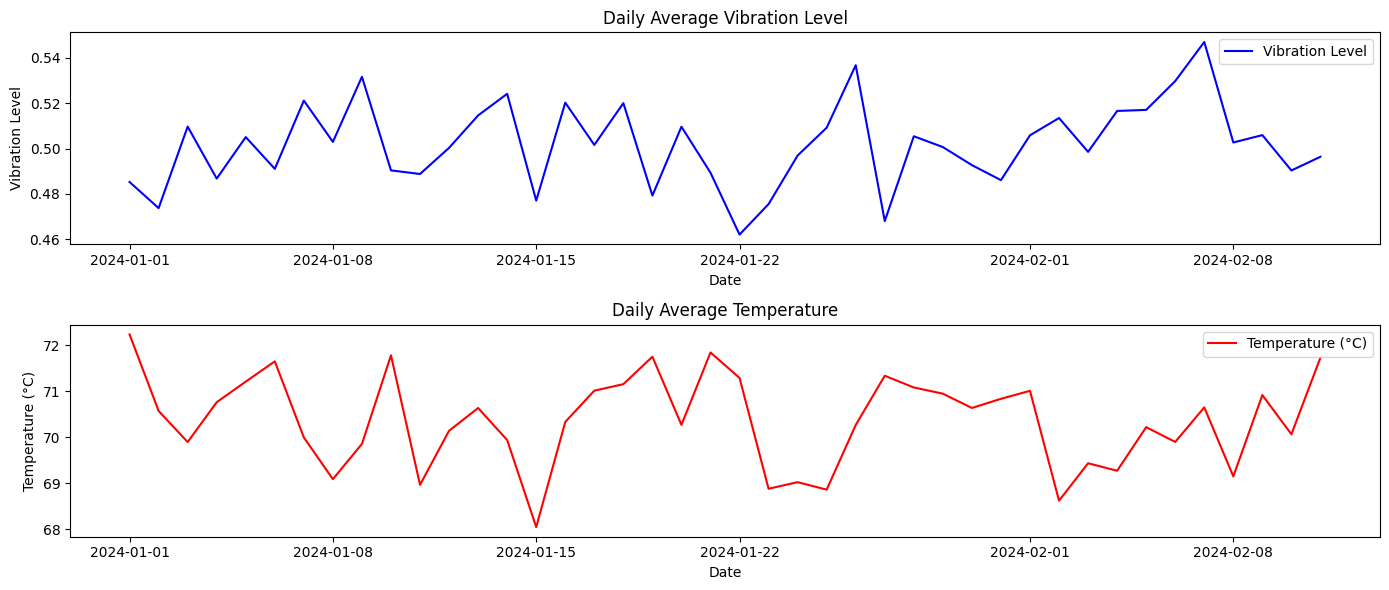

In [178]:
df = pump_failure_data.set_index('timestamp', inplace=False)

daily_data = df.resample('D').mean()

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(daily_data.index, daily_data['vibration_level'], label='Vibration Level', color='b')
plt.xlabel('Date')
plt.ylabel('Vibration Level')
plt.title('Daily Average Vibration Level')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(daily_data.index, daily_data['temperature_C'], label='Temperature (°C)', color='r')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature')
plt.legend()

plt.tight_layout()
plt.show()


- Weekly Aggregation

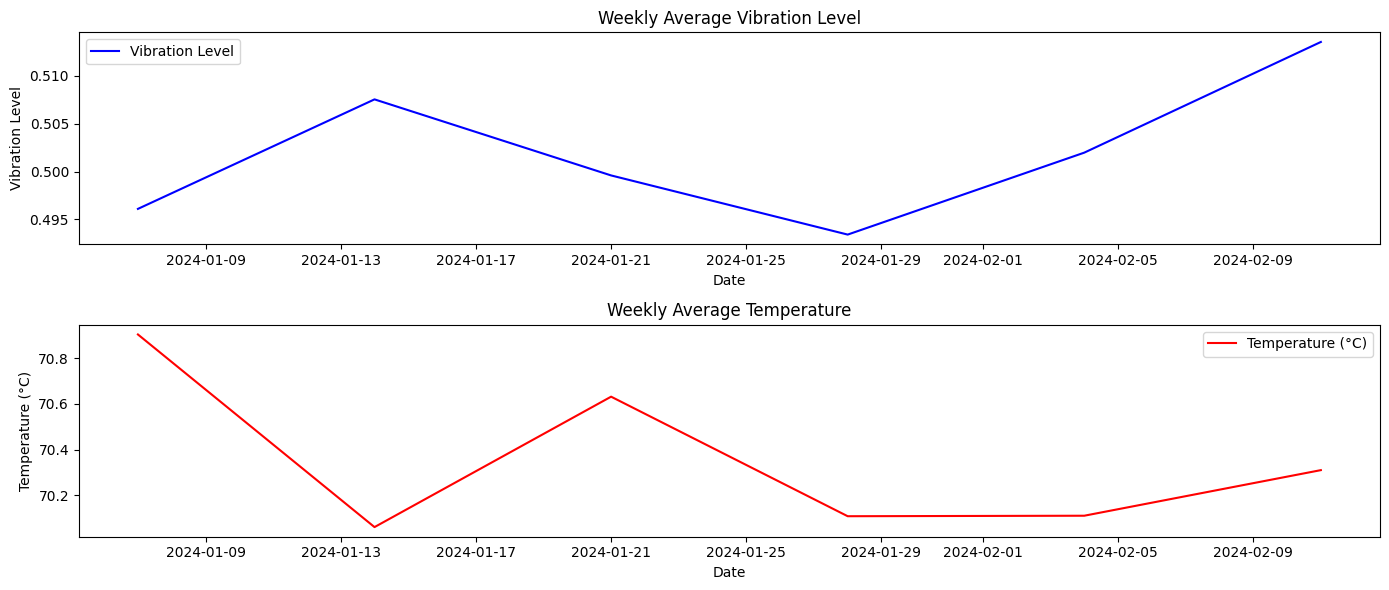

In [179]:
weekly_data = df.resample('W').mean()

plt.figure(figsize=(14, 6))

plt.subplot(2, 1, 1)
plt.plot(weekly_data.index, weekly_data['vibration_level'], label='Vibration Level', color='b')
plt.xlabel('Date')
plt.ylabel('Vibration Level')
plt.title('Weekly Average Vibration Level')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(weekly_data.index, weekly_data['temperature_C'], label='Temperature (°C)', color='r')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Weekly Average Temperature')
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\DELL\anaconda3\envs\AI\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


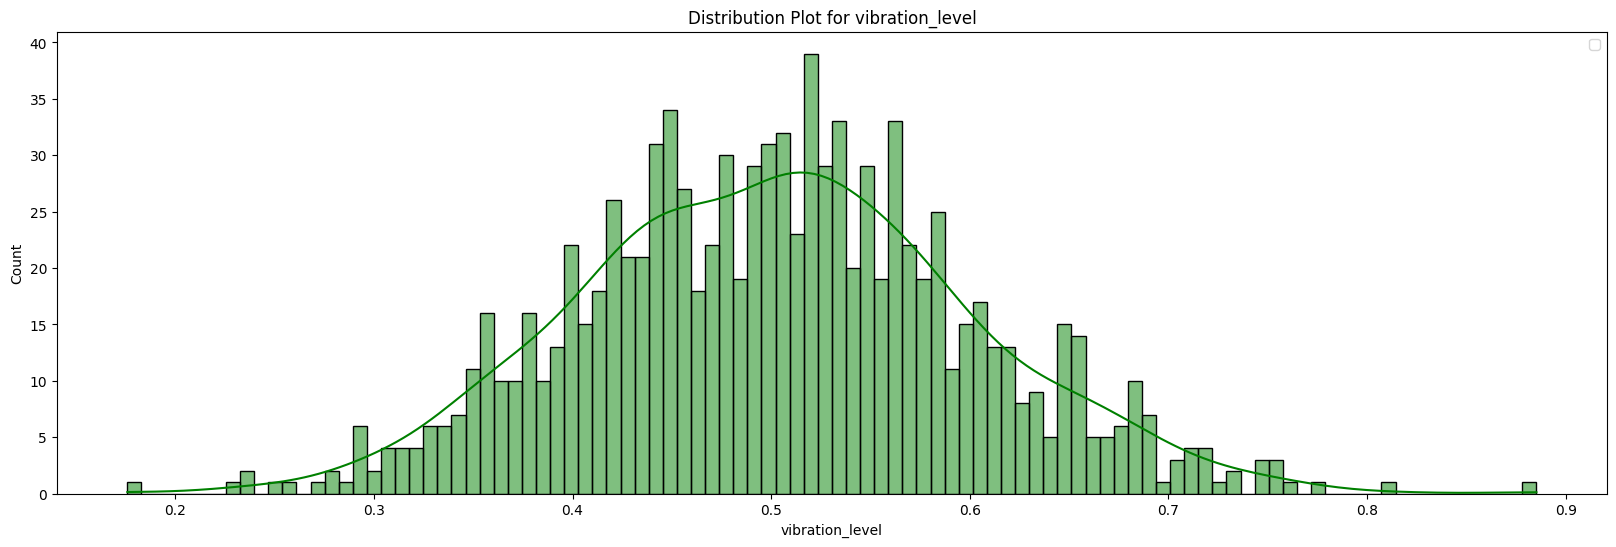

c:\Users\DELL\anaconda3\envs\AI\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


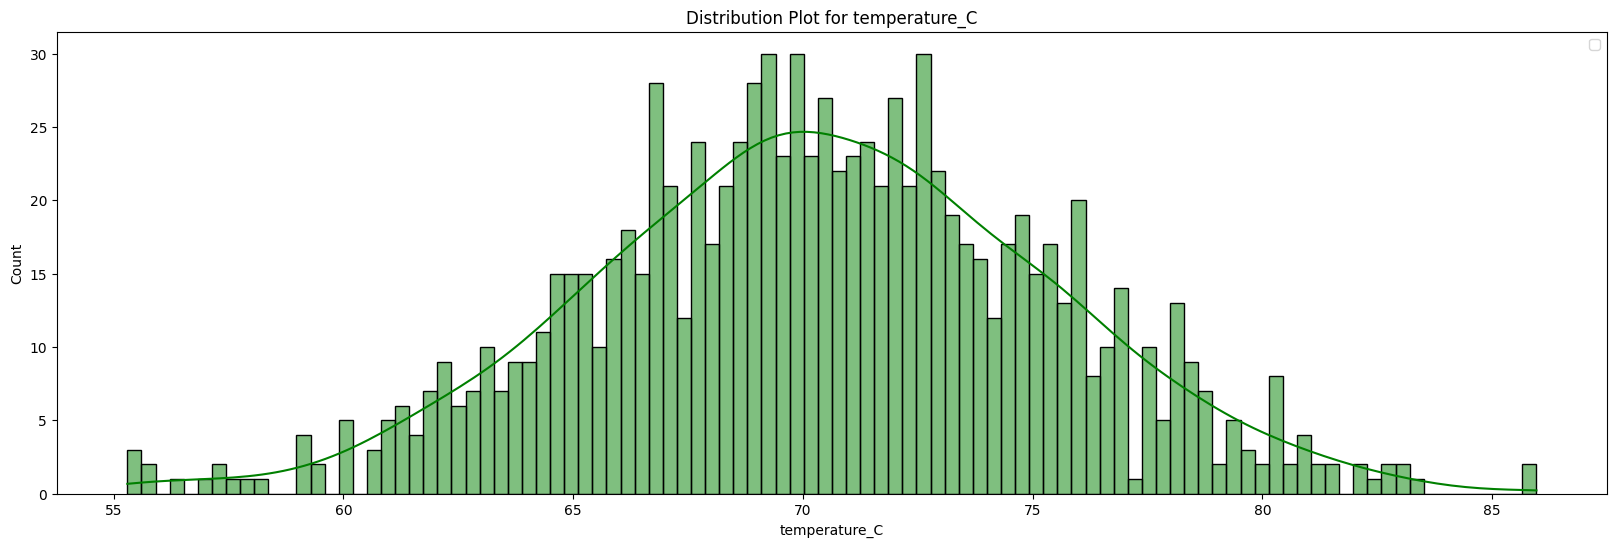

c:\Users\DELL\anaconda3\envs\AI\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


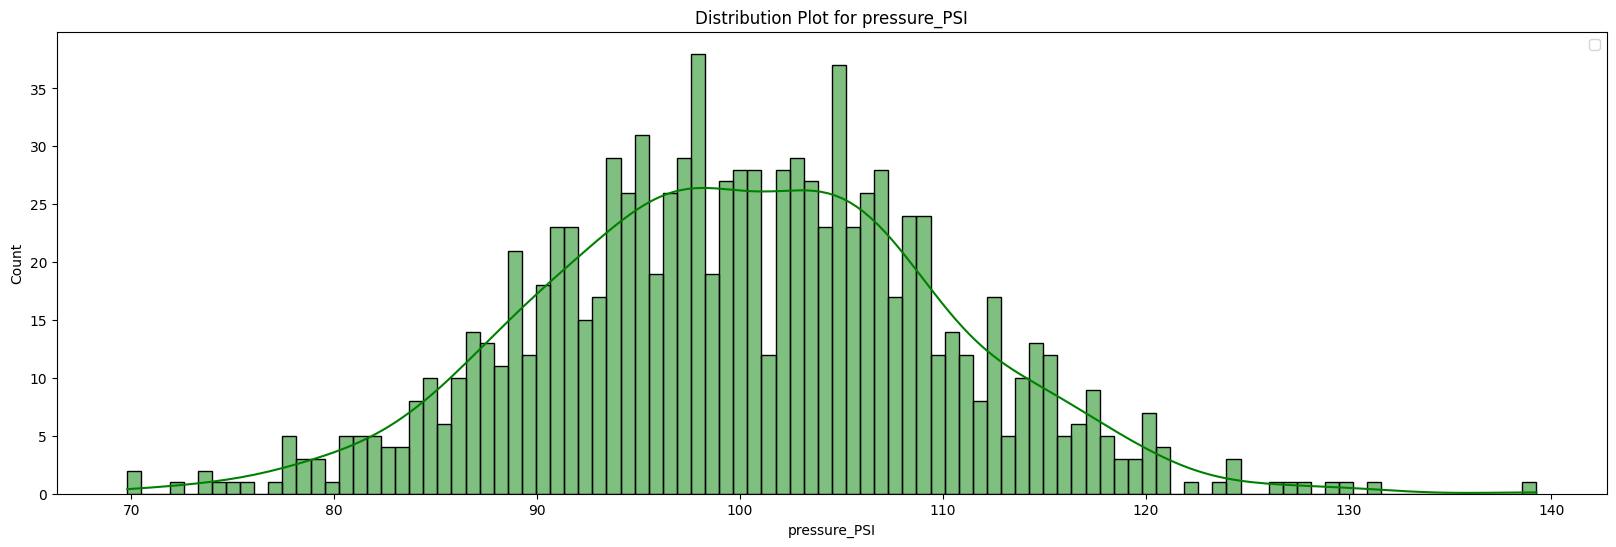

c:\Users\DELL\anaconda3\envs\AI\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


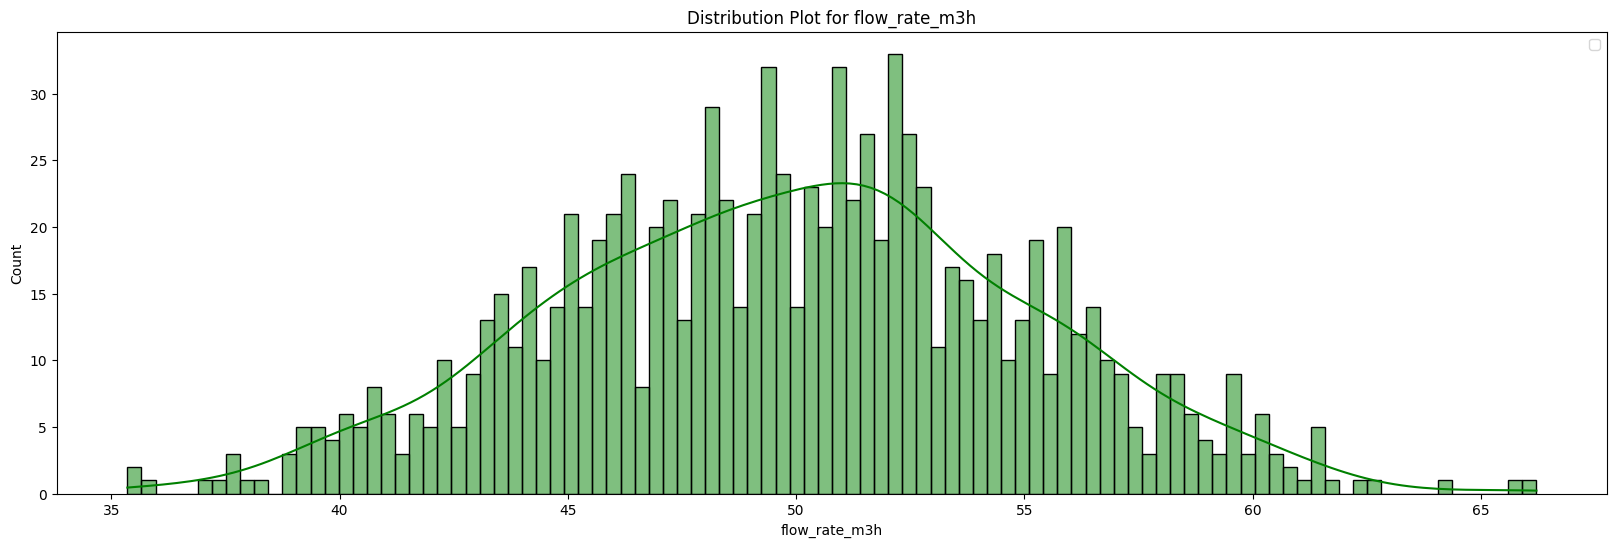

In [176]:
selected_features = ["vibration_level", "temperature_C", "pressure_PSI", "flow_rate_m3h"]
for selected_feature in selected_features:

    plt.figure(figsize=(20, 6))
    ax = sns.histplot(data=pump_failure_data, x=selected_feature, kde=True, color='green', bins=100)


    plt.xlabel(selected_feature)
    plt.title(f'Distribution Plot for {selected_feature}')
    plt.legend()

    plt.show()

The visualizations indicate that the data appears to be approximately `Normal (Gaussian) Distributed` for all features. However, we'll further validate this using additional `Statistical` (Finding Kurtosis, Standard Deviation etc) techniques to quantify how closely the data follows a `Normal Distribution`.

In [180]:
def quantify_feature_distribution(df, selected_features):
    results_df = pd.DataFrame(columns=['Feature', 'Mean', 'Standard Deviation', 'Kurtosis', 'Skewness'])

    for column in selected_features:
        if df[column].dtype != 'object':
            mean_value = df[column].mean()
            std_dev = df[column].std()
            kurt = kurtosis(df[column])
            skewness = skew(df[column])

            temp_df = pd.DataFrame({
                'Feature': [column],
                'Mean': [mean_value],
                'Standard Deviation': [std_dev],
                'Kurtosis': [kurt],
                'Skewness': [skewness]
            })
            
            results_df = pd.concat([results_df, temp_df], ignore_index=True)

    return results_df

selected_features = ["vibration_level", "temperature_C", "pressure_PSI", "flow_rate_m3h"]
distribution_df = quantify_feature_distribution(pump_failure_data, selected_features)
distribution_df


C:\Users\DELL\AppData\Local\Temp\ipykernel_7268\2463014152.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, temp_df], ignore_index=True)


,Feature,Mean,Standard Deviation,Kurtosis,Skewness
0,vibration_level,0.501933,0.097922,0.066206,0.116801
1,temperature_C,70.354181,4.987272,0.052118,-0.049322
2,pressure_PSI,100.058342,9.834543,0.165347,0.061155
3,flow_rate_m3h,49.906404,5.135663,-0.234124,-0.002118


- **1. Vibration Level** 
    - The `kurtosis` is close to 0, indicating a relatively normal distribution.
    - The `skewness` is also close to 0, suggesting that the distribution is fairly symmetric.

- **2. Temprature C**
    - The kurtosis is near 0, indicating a distribution that is neither too peaked nor too flat, which is typical of a normal distribution.
    - The skewness is very close to 0, showing a symmetric distribution.

- **3. Pressure PSI**
    - The kurtosis is slightly positive, but still close to 0, indicating a distribution with tails similar to a normal distribution.
    - The skewness is minimal, suggesting symmetry.

- **4. Flow Rate (m³/h)**
    - The kurtosis is slightly negative, suggesting a distribution with slightly lighter tails than a normal distribution, but this value is still close to 0.
    - The skewness is almost 0, indicating symmetry.

**Conclusion**
    The `vibration_level` data appears to be normally distributed. The `temperature_C` and `pressure_psi` data is likely normally distributed. and The `flow_rate_m3h` data is close to normally distributed.


#### Standarization / Normalization 

Since our data shows that almost all features are close to a `Normal Distribution`, we will use `Standardization` techniques on our data.

In [181]:
scaler = StandardScaler()
features = pump_failure_data.drop(['failure', 'timestamp'], axis=1)

scaled_features = scaler.fit_transform(features)

joblib.dump(scaler, 'scaler.pkl')

scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

scaled_df['failure'] = pump_failure_data['failure'].values


#### Split Data in train and test

In [182]:
X = scaled_df.drop('failure', axis=1)
y = scaled_df['failure']

In [183]:
print("X Shape: ", X.shape)
print("y Shape: ", y.shape)

X Shape:  (1000, 4)
y Shape:  (1000,)


In [184]:
train_size = int(len(scaled_df) * 0.8)  # 80% training data
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

In [185]:
print("Training feature shape:", X_train.shape)
print("Test feature shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Test target shape:", y_test.shape)

Training feature shape: (800, 4)
Test feature shape: (200, 4)
Training target shape: (800,)
Test target shape: (200,)


# Classification Model Development

We have only two classes, `0` and `1`, so we will develop a Random Forest model.

In [186]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

#### Model Evaluation

In [187]:
y_pred = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       190
           1       1.00      0.90      0.95        10

    accuracy                           0.99       200
   macro avg       1.00      0.95      0.97       200
weighted avg       1.00      0.99      0.99       200



The Random Forest model provides a significant improvement over the Logistic Regression model, especially in handling the minority class (1). It manages to achieve high performance metrics across both classes, making it a strong candidate for your classification task.

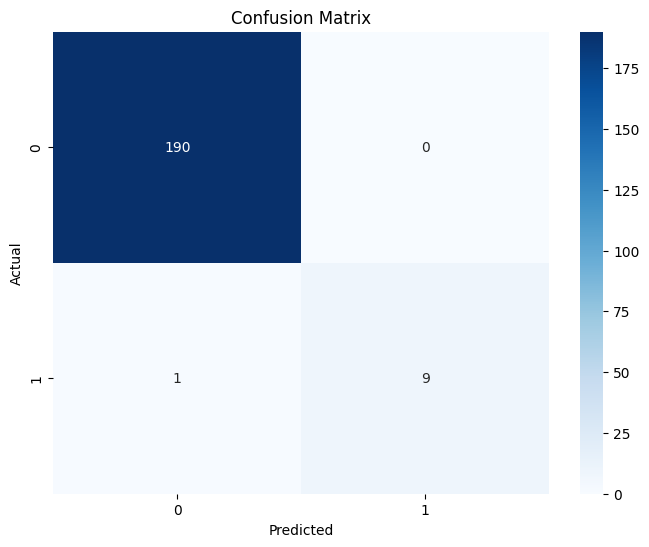

In [188]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['0', '1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

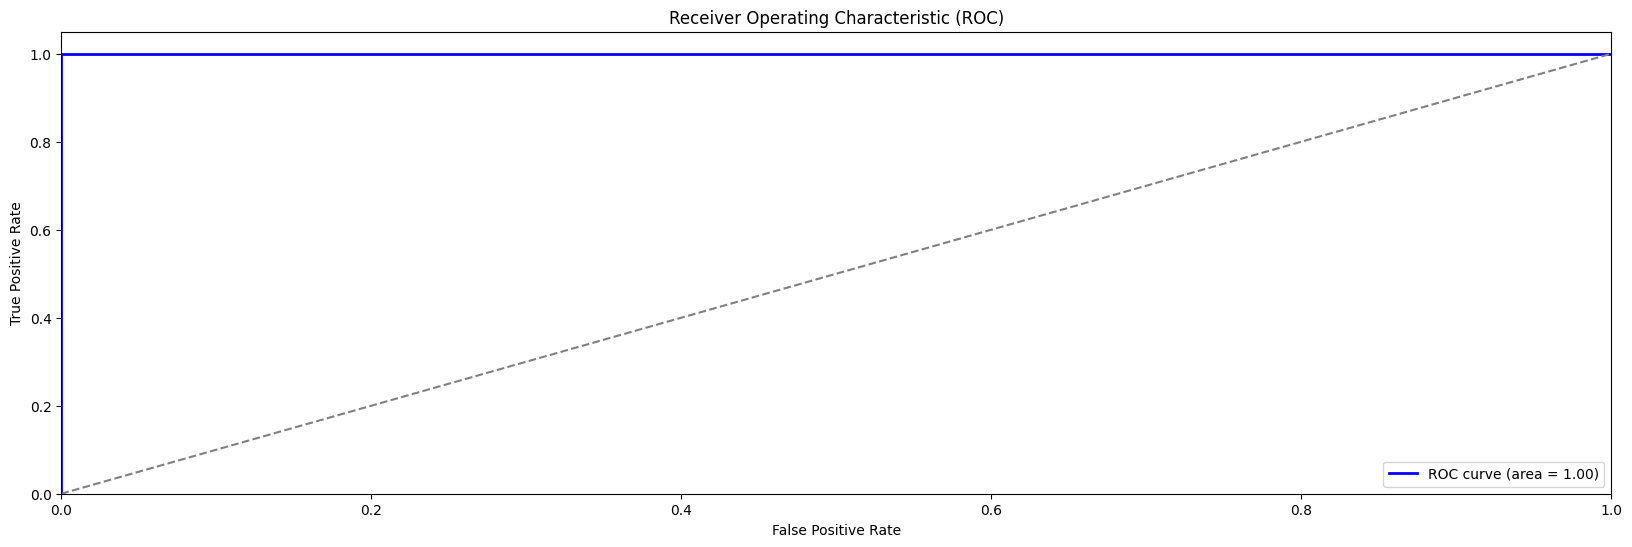

In [189]:
y_prob = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

roc_auc = roc_auc_score(y_test, y_prob)
plt.figure(figsize=(20, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


#### Save Model

In [190]:
joblib.dump(rf_model, 'models/pump_failure_rf_model.pkl')

['pump_failure_rf_model.pkl']